In [1]:
import pandas as pd
import mplsoccer as mps
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from urllib.request import urlopen
from highlight_text import fig_text
from mplsoccer import PyPizza, FontManager,add_image

In [2]:
sho=pd.read_html("https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=by_type&dom_lg=1&spec_comps=big_5&player_id1=8b609c34&p1yrfrom=2022-2023&player_id2=0ab1f153&p2yrfrom=2020-2021#standard_stats")[1]
pass_=pd.read_html("https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=by_type&dom_lg=1&spec_comps=big_5&player_id1=8b609c34&p1yrfrom=2022-2023&player_id2=0ab1f153&p2yrfrom=2020-2021#standard_stats")[2]
def_=pd.read_html("https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=by_type&dom_lg=1&spec_comps=big_5&player_id1=8b609c34&p1yrfrom=2022-2023&player_id2=0ab1f153&p2yrfrom=2020-2021#standard_stats")[5]
poss=pd.read_html("https://fbref.com/en/stathead/player_comparison.cgi?request=1&sum=0&comp_type=by_type&dom_lg=1&spec_comps=big_5&player_id1=8b609c34&p1yrfrom=2022-2023&player_id2=0ab1f153&p2yrfrom=2020-2021#standard_stats")[6]

In [3]:
pd.set_option("display.max_columns",150)

In [4]:
# derive per90 for all
for i in range(sho.columns.size):
    if i<=5:
        continue
    sho[sho.columns[i]]=sho[sho.columns[i]].divide(sho[sho.columns[5]]).round(2)

In [5]:
for i in range(pass_.columns.size):
    if i<=5:
        continue
    pass_[pass_.columns[i]]=pass_[pass_.columns[i]].divide(pass_[pass_.columns[5]]).round(2)

In [6]:
for i in range(def_.columns.size):
    if i<=5:
        continue
    def_[def_.columns[i]]=def_[def_.columns[i]].divide(def_[def_.columns[5]]).round(2)

In [7]:
for i in range(poss.columns.size):
    if i<=5:
        continue
    poss[poss.columns[i]]=poss[poss.columns[i]].divide(poss[poss.columns[5]]).round(2)

In [8]:
poss

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     Wilfried Singo            2022-23             ci CIV                 DF   
1      Juan Cuadrado            2020-21             co COL              DF,MF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Touches                          \
               Squad                90s Touches Def Pen Def 3rd Mid 3rd   
0             Torino                8.6   59.53    2.44   13.95   28.26   
1           Juventus               24.2   83.06    1.74   17.40   37.98   

                         Dribbles                         Receiving        
  Att 3rd Att Pen   Live     Succ   Att Succ%   Mis   Dis       Rec  Prog  
0   18.02    2.44  59.53     0.93  2.09  5.16  1.40  0.70     35.00  1.28  
1   28.80    3.06  83.02     1.86  2.81  2.74  1.94  0.83     61.53  4.13

In [9]:
# possession & touch adjusted 
poss1=52.9
poss2=50.9
list1=[]
list2=[]

In [10]:
def_

Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Unnamed: 3_level_0  \
              Player               Span             Nation                Pos   
0     Wilfried Singo            2022-23             ci CIV                 DF   
1      Juan Cuadrado            2020-21             co COL              DF,MF   

  Unnamed: 4_level_0 Unnamed: 5_level_0 Tackles                                \
               Squad                90s     Tkl  TklW Def 3rd Mid 3rd Att 3rd   
0             Torino                8.6    1.16  0.81    0.70    0.23    0.23   
1           Juventus               24.2    1.78  1.03    0.91    0.62    0.25   

  Vs Dribbles                    Blocks             Unnamed: 18_level_0  \
          Tkl   Att   Tkl%  Past Blocks    Sh  Pass                 Int   
0        0.81  0.81  11.63  0.00   0.81  0.00  0.81                0.35   
1        1.20  2.48   2.00  1.28   0.66  0.08  0.58                1.78   

  Unnamed: 19_level_0 Unnamed: 20_level_0 Unnamed: 21_level_0  
              Tkl+Int                 Clr                 Err  
0                1.51                2.21                0.00  
1                3.55                0.91                0.08

In [11]:
for i in def_.iloc[0].values.tolist()[6:]:
    i=i*(poss1/50)
    i=i.round(2)
    list1.append(i)
    print(i)   

1.23
0.86
0.74
0.24
0.24
0.86
0.86
12.3
0.0
0.86
0.0
0.86
0.37
1.6
2.34
0.0


In [12]:
for i in def_.iloc[1].values.tolist()[6:]:
    i=i*(poss2/50)
    i=i.round(2)
    list2.append(i)
    print(i)   

1.81
1.05
0.93
0.63
0.25
1.22
2.52
2.04
1.3
0.67
0.08
0.59
1.81
3.61
0.93
0.08


In [13]:
def_.iloc[0,6:22]=list1
def_.iloc[1,6:22]=list2

In [14]:
sho.columns = sho.columns.droplevel(0)
pass_.columns = pass_.columns.droplevel(0)
def_.columns = def_.columns.droplevel(0)
poss.columns = poss.columns.droplevel(0)

In [15]:
df1=pd.merge(sho,pass_,how="left",on=["Player","Span","Nation","Pos","Squad","90s"])
df2=pd.merge(df1,def_,how="left",on=["Player","Span","Nation","Pos","Squad","90s"])
df=pd.merge(df2,poss,how="left",on=["Player","Span","Nation","Pos","Squad","90s"])

In [16]:
poss

,Player,Span,Nation,Pos,Squad,90s,Touches,Def Pen,Def 3rd,Mid 3rd,Att 3rd,Att Pen,Live,Succ,Att,Succ%,Mis,Dis,Rec,Prog
0,Wilfried Singo,2022-23,ci CIV,DF,Torino,8.6,59.53,2.44,13.95,28.26,18.02,2.44,59.53,0.93,2.09,5.16,1.40,0.70,35.00,1.28
1,Juan Cuadrado,2020-21,co COL,"DF,MF",Juventus,24.2,83.06,1.74,17.40,37.98,28.80,3.06,83.02,1.86,2.81,2.74,1.94,0.83,61.53,4.13


In [17]:
df

,Player,Span,Nation,Pos,Squad,90s,Gls,Sh_x,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Cmp,Att_x,Cmp%,TotDist,PrgDist,Cmp,Att_x,Cmp%,Cmp,Att_x,Cmp%,Cmp,Att_x,Cmp%,Ast,xAG,xA,A-xAG,KP,1/3,PPA,CrsPA,Prog_x,Tkl,TklW,Def 3rd_x,Mid 3rd_x,Att 3rd_x,Tkl,Att_y,Tkl%,Past,Blocks,Sh_y,Pass,Int,Tkl+Int,Clr,Err,Touches,Def Pen,Def 3rd_y,Mid 3rd_y,Att 3rd_y,Att Pen,Live,Succ,Att,Succ%,Mis,Dis,Rec,Prog_y
0,Wilfried Singo,2022-23,ci CIV,DF,Torino,8.6,0.00,1.16,0.12,1.16,0.13,0.01,0.0,0.00,1.49,0.0,0.00,0.00,0.08,0.08,0.01,-0.08,-0.08,37.44,49.65,8.77,650.00,198.02,16.86,19.88,9.86,16.16,21.98,8.55,3.26,5.47,6.93,0.12,0.06,0.07,0.06,0.93,2.44,1.16,0.35,2.67,1.23,0.86,0.74,0.24,0.24,0.86,0.86,12.30,0.0,0.86,0.00,0.86,0.37,1.60,2.34,0.00,59.53,2.44,13.95,28.26,18.02,2.44,59.53,0.93,2.09,5.16,1.40,0.70,35.00,1.28
1,Juan Cuadrado,2020-21,co COL,"DF,MF",Juventus,24.2,0.08,0.74,0.25,1.38,0.03,0.01,0.0,0.01,0.74,0.0,0.04,0.04,0.10,0.06,0.00,-0.01,-0.02,60.58,73.88,3.39,1113.55,300.83,25.66,28.31,3.75,27.31,30.70,3.68,6.94,11.98,2.39,0.41,0.34,0.24,0.07,2.48,3.88,1.45,0.33,4.83,1.81,1.05,0.93,0.63,0.25,1.22,2.52,2.04,1.3,0.67,0.08,0.59,1.81,3.61,0.93,0.08,83.06,1.74,17.40,37.98,28.80,3.06,83.02,1.86,2.81,2.74,1.94,0.83,61.53,4.13


In [18]:
df.iloc[0]["Touches"]

59.53

In [19]:
obv1=df.iloc[0][["npxG","xA","KP","1/3","PPA","Prog_x"]].values.tolist()
obv2=df.iloc[1][["npxG","xA","KP","1/3","PPA","Prog_x"]].values.tolist()

In [20]:
for i in range(len(obv1)):
    obv1[i]=100*obv1[i]/df.iloc[0]["Touches"].round(2)
    obv2[i]=100*obv2[i]/df.iloc[1]["Touches"].round(2)

In [21]:
for i in range(len(obv1)):
    obv1[i]=obv1[i].round(2)
    obv2[i]=obv2[i].round(2)

In [22]:
obv1

[0.13, 0.12, 1.56, 4.1, 1.95, 4.49]

In [23]:
val1=df.iloc[0][["Int","TklW","Past"]].values.tolist()
val2=df.iloc[1][["Int","TklW","Past"]].values.tolist()

In [24]:
LOGO_URL = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQRjXPcgoSI5R9W3yWYtDiWplvO7EUYmebYsA&usqp=CAU'
sb_logo1 = Image.open("C:/Users/Rahul/OneDrive/Pictures/WC article/singo_wilfried-1-removebg-preview.png")
sblogo2=Image.open(urlopen("https://volante.info/wp-content/uploads/2020/12/player_61906615_l.png"))

In [25]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

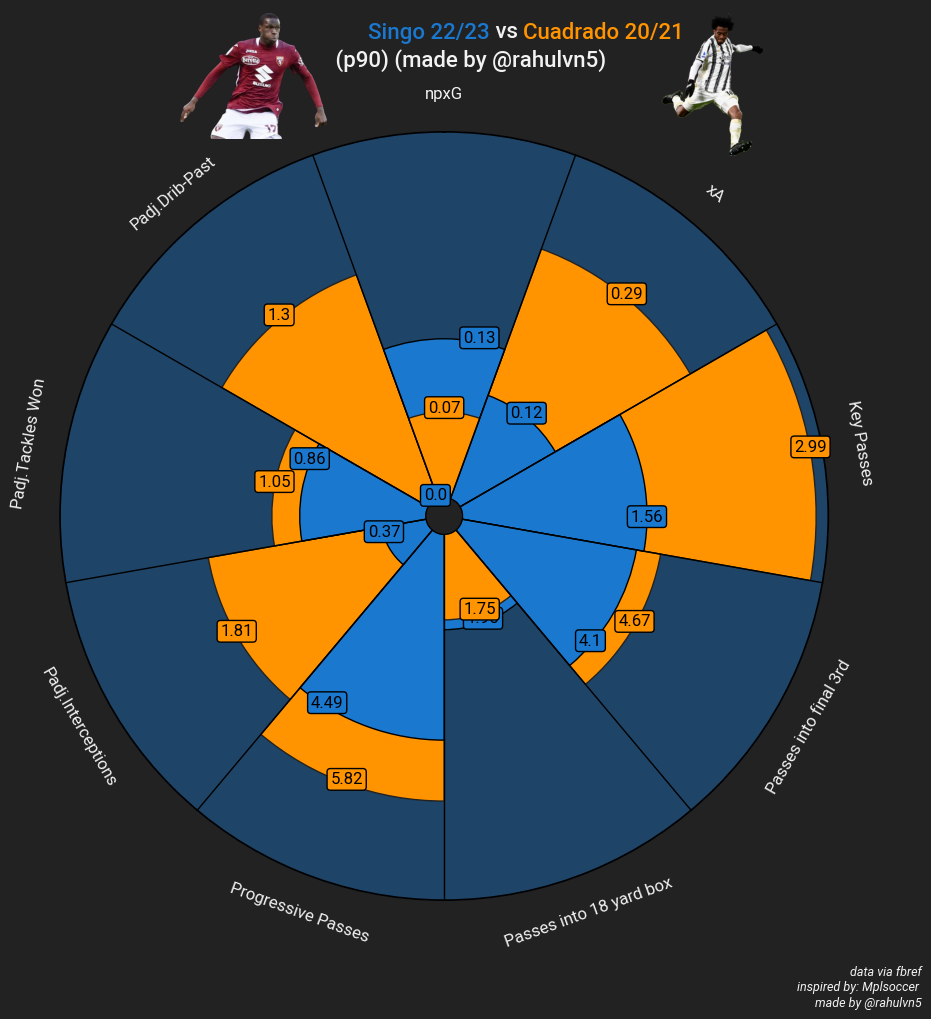

In [29]:
from highlight_text import fig_text

params = ["npxG","xA","Key Passes","Passes into final 3rd","Passes into 18 yard box","Progressive Passes","Padj.Interceptions","Padj.Tackles Won","Padj.Drib-Past"]
values = obv1 + val1 # renato
values_2= obv2 + val2 # rovella

# minimum range value and maximum range value for parameters
min_range = [0,0,0,0,0,0,0,0,0]
max_range = [0.3,0.4,3.1,8.5,7.5,8,3,2.5,2]

# pass True in that parameter-index whose values are to be adjusted
# here True values are passed for "Pressure Regains", "pAdj Tackles" params
params_offset = [
    True, False, True, True, False,
    True, True,True,True]

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range,        # max range values
    background_color="#222222", straight_line_color="#000000",
    last_circle_color="#000000", last_circle_lw=2.5, other_circle_lw=0,
    other_circle_color="#000000", straight_line_lw=1
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                     # list of values
    compare_values=values_2,    # passing comparison values
    figsize=(10, 10),             # adjust figsize according to your need
    color_blank_space="same",   # use same color to fill blank space
    blank_alpha=0.4,            # alpha for blank-space colors
    param_location=110,         # where the parameters will be added
    kwargs_slices=dict(
        facecolor="#1A78CF", edgecolor="#000000",
        zorder=1, linewidth=1
    ),                          # values to be used when plotting slices
    kwargs_compare=dict(
        facecolor="#ff9300", edgecolor="#222222", zorder=3, linewidth=1,
    ),                          # values to be used when plotting comparison slices
    kwargs_params=dict(
        color="#F2F2F2", fontsize=12, zorder=5,
        fontproperties=font_normal.prop, va="center"
    ),                          # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#1A78CF",
            boxstyle="round,pad=0.2", lw=1
        )
    ),                           # values to be used when adding parameter-values
    kwargs_compare_values=dict(
        color="#000000", fontsize=12,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="#FF9300",
            boxstyle="round,pad=0.2", lw=1
        )
    )                            # values to be used when adding comparison-values
)


# adjust the texts
# to adjust text for comparison-values-text pass adj_comp_values=True
baker.adjust_texts(params_offset, offset=0.2)

# add title
fig_text(
    0.575, 0.99, "       <Singo 22/23> vs <Cuadrado 20/21>\n (p90) (made by @rahulvn5)",
    size=16, fig=fig,
    highlight_textprops=[{"color": '#1A78CF'}, {"color": '#FF9300'}],
    ha="center", fontproperties=font_bold.prop, color="#F2F2F2"
)
ax_image = add_image(
    sb_logo1, fig, left=0.2078, bottom=0.8715, width=0.25, height=0.127
)
ax_image = add_image(
    sblogo2, fig, left=0.6778, bottom=0.8515, width=0.25, height=0.15
)

# these values might differ when you are plotting
# add credits
CREDIT_1 = "data via fbref"
CREDIT_2 = "inspired by: Mplsoccer \nmade by @rahulvn5"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    fontproperties=font_italic.prop, color="#F2F2F2",
    ha="right"
)
plt.show()